In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('../input/maternal-health-risk/Maternal Health Risk Data Set.csv')

In [12]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [14]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Checking the dataset distribution

In [15]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [16]:
data['RiskLevel'].value_counts()/len(data)

low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: RiskLevel, dtype: float64

<AxesSubplot:ylabel='RiskLevel'>

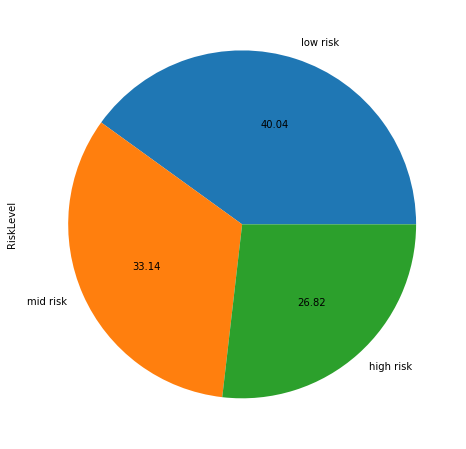

In [17]:
data['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

# Seperating dependent and independent variable

In [18]:
X=data.drop(columns=['RiskLevel'])
Y=data['RiskLevel']

In [19]:
X.shape

(1014, 6)

In [20]:
Y.shape

(1014,)

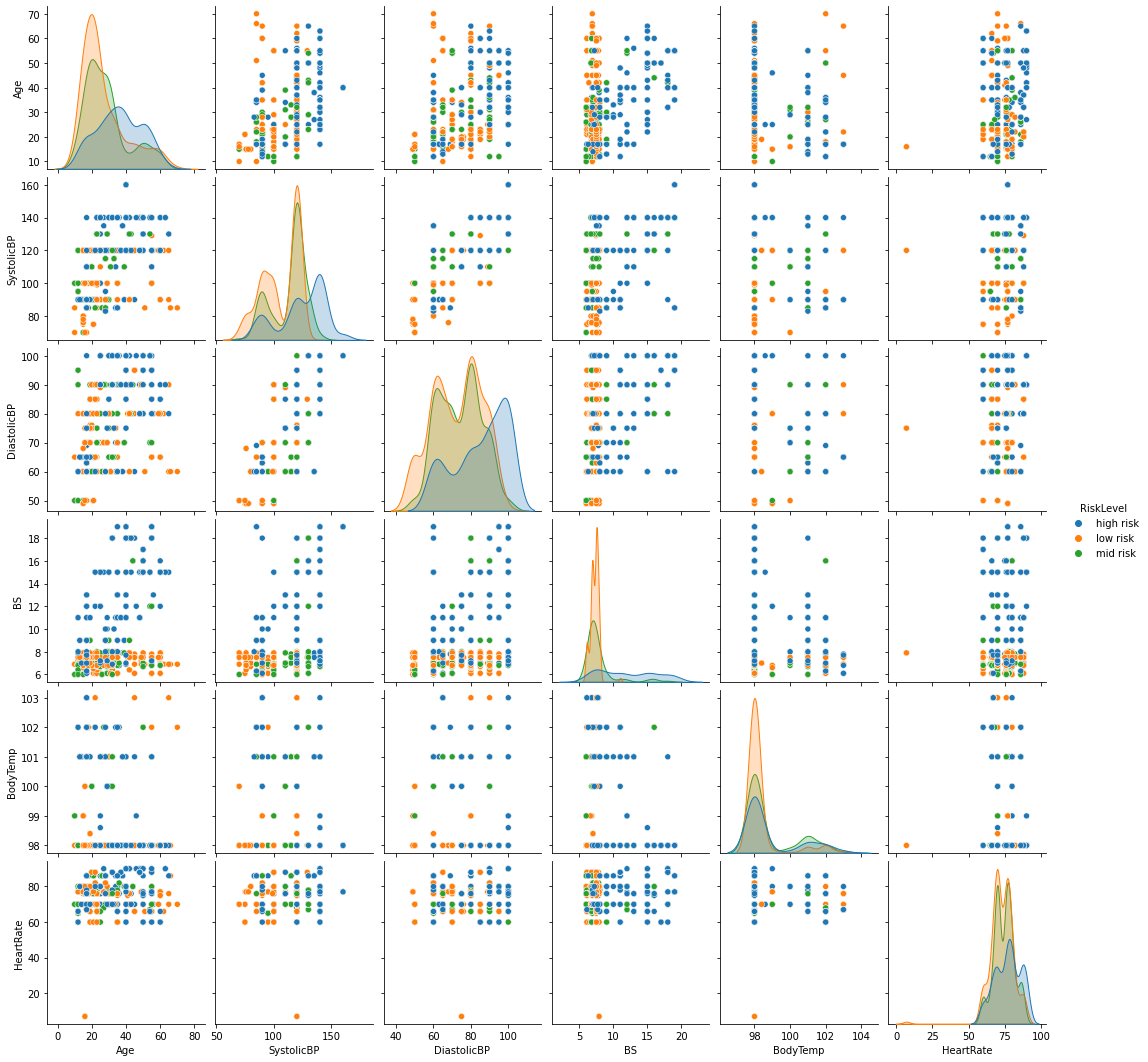

In [21]:
sns.pairplot(data,hue='RiskLevel')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

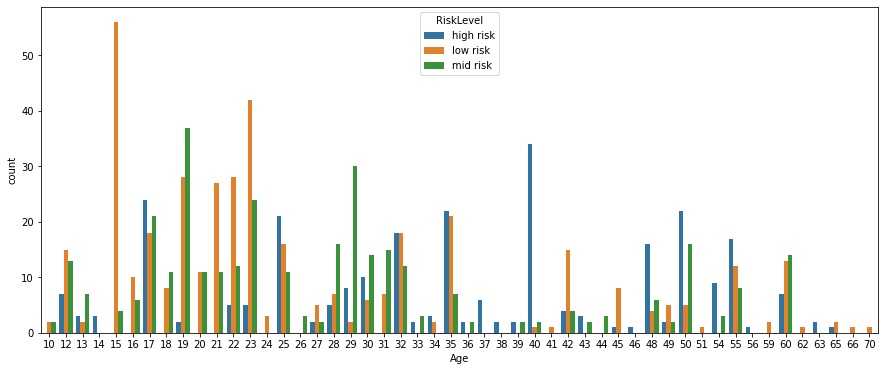

In [22]:
plt.figure(figsize=(15,6))
sns.countplot('Age',hue='RiskLevel',data=data)

<AxesSubplot:>

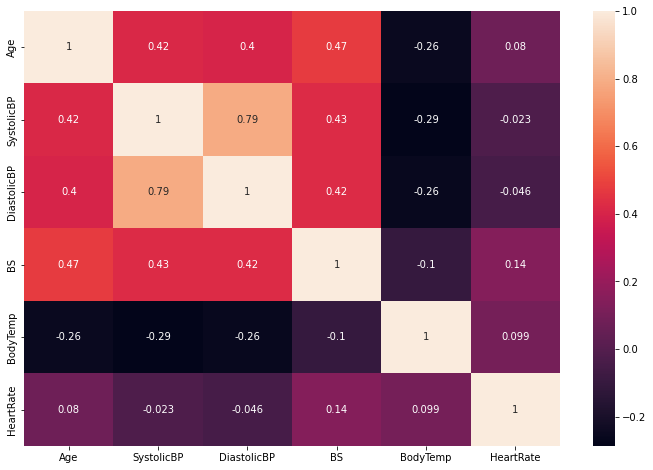

In [23]:
correlation =data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot =True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DiastolicBP', ylabel='SystolicBP'>

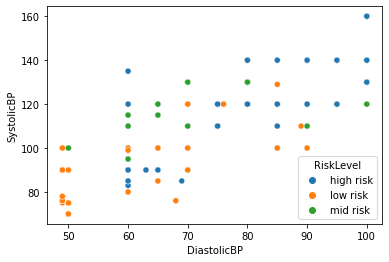

In [24]:
sns.scatterplot('DiastolicBP','SystolicBP',hue='RiskLevel',data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

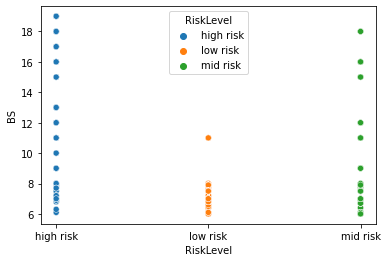

In [25]:
sns.scatterplot('RiskLevel','BS',hue='RiskLevel',data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='BS'>

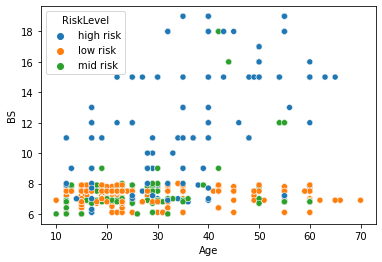

In [26]:
sns.scatterplot('Age','BS',hue='RiskLevel',data=data)

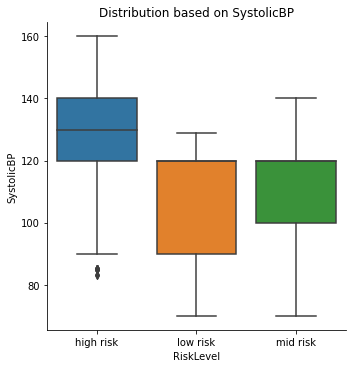

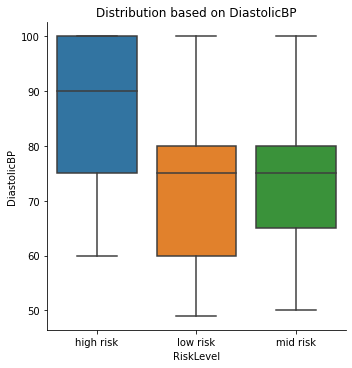

In [27]:
sns.catplot(x="RiskLevel", y="SystolicBP", data=data, kind="box").set(title="Distribution based on SystolicBP")
sns.catplot(x="RiskLevel", y="DiastolicBP", data=data, kind="box").set(title="Distribution based on DiastolicBP")

# Scaling the dataset

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

# Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.70,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((709, 6), (305, 6), (709,), (305,))

In [30]:
x_train.size

4254

In [31]:
x_test.size

1830

# Model Building, predictions and odds ratio

# Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[1.08519204e-01, 4.38172319e-01, 4.53308477e-01],
        [3.67286493e-01, 2.25046426e-01, 4.07667081e-01],
        [3.51984465e-02, 6.71670402e-01, 2.93131151e-01],
        [1.24790328e-01, 2.69979118e-01, 6.05230554e-01],
        [7.50062328e-02, 6.06778974e-01, 3.18214793e-01],
        [1.70311995e-01, 1.90044229e-01, 6.39643775e-01],
        [7.01688913e-02, 5.63835050e-01, 3.65996059e-01],
        [3.54081179e-02, 4.16798732e-01, 5.47793150e-01],
        [6.90551802e-01, 4.03908935e-02, 2.69057304e-01],
        [5.64562280e-01, 7.21888952e-02, 3.63248825e-01],
        [4.38391434e-01, 1.75961733e-01, 3.85646833e-01],
        [3.43037566e-01, 2.00922231e-01, 4.56040203e-01],
        [2.38763469e-02, 7.09938378e-01, 2.66185275e-01],
        [9.65250862e-02, 4.26998473e-01, 4.76476441e-01],
        [1.15051179e-01, 4.31354103e-01, 4.53594718e-01],
        [1.90148465e-02, 7.66569982e-01, 2.14415171e-01],
        [3.74504030e-02, 4.08753426e-01, 5.53796171e-01],
        [9.455

In [33]:
y_train.shape

(709,)

In [34]:
predicted_values.shape

(305,)

In [35]:
y_test.shape

(305,)

1. Confusion matrix(Logistic Regression)

In [36]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[60,  5, 17],
       [ 6, 86, 30],
       [23, 37, 41]])

1(a)Accuracy matrix

In [37]:
classifier.score(x_test,y_test)

0.6131147540983607

1(b)Calculating the precision score

In [38]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [39]:
precision

array([0.6741573 , 0.671875  , 0.46590909])

In [40]:
recall

array([0.73170732, 0.70491803, 0.40594059])

In [41]:
f1

array([0.70175439, 0.688     , 0.43386243])

In [42]:
support

array([ 82, 122, 101])

<AxesSubplot:>

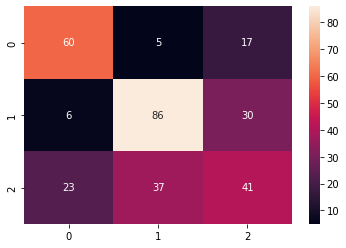

In [43]:
sns.heatmap(confusion_matrix(y_test,predicted_values),annot=True)

In [44]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

   high risk       0.67      0.73      0.70        82
    low risk       0.67      0.70      0.69       122
    mid risk       0.47      0.41      0.43       101

    accuracy                           0.61       305
   macro avg       0.60      0.61      0.61       305
weighted avg       0.60      0.61      0.61       305



# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [46]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
pred= model.predict(x_test)

<AxesSubplot:>

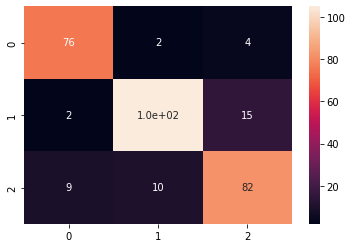

In [48]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [49]:
model.score(x_test,y_test)

0.8622950819672132

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   high risk       0.87      0.93      0.90        82
    low risk       0.90      0.86      0.88       122
    mid risk       0.81      0.81      0.81       101

    accuracy                           0.86       305
   macro avg       0.86      0.87      0.86       305
weighted avg       0.86      0.86      0.86       305



In [51]:
from sklearn.preprocessing import StandardScaler    
scale = StandardScaler()  
x_train= scale.fit_transform(x_train)    
x_test= scale.transform(x_test) 

In [52]:
x_train

array([[-0.34096191,  0.34432827,  0.9405713 , -0.62741662,  1.73365201,
         0.75085067],
       [ 0.7672685 ,  2.58609821,  1.67573286,  3.08934025, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -2.00007494, -0.56698155, -0.47759639,
        -1.67058725],
       ...,
       [-0.93201812, -1.33699918, -1.04436491, -0.56698155,  1.73365201,
        -0.45986829],
       [-1.07978217, -2.12161866, -2.0735911 , -0.71806923, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -0.8973326 , -0.38567634, -0.47759639,
         0.26656309]])

In [53]:
modelDTC= DecisionTreeClassifier(criterion='gini', random_state=101)  
modelDTC.fit(x_train, y_train) 

DecisionTreeClassifier(random_state=101)

In [54]:
y_pred= modelDTC.predict(x_test) 

In [55]:
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


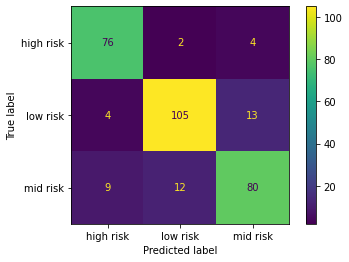

In [56]:
plot_confusion_matrix(modelDTC,x_test,y_test)

In [57]:
modelDTC.score(x_test,y_test)

0.8557377049180328

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   high risk       0.85      0.93      0.89        82
    low risk       0.88      0.86      0.87       122
    mid risk       0.82      0.79      0.81       101

    accuracy                           0.86       305
   macro avg       0.85      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RF= RandomForestClassifier(criterion='gini')
RF.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
predict=RF.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


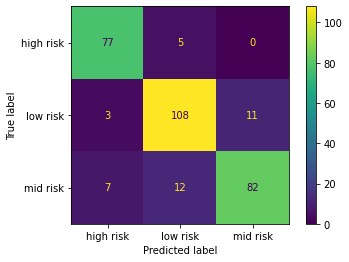

In [62]:
plot_confusion_matrix(RF,x_test,y_test)

In [63]:
RF.score(x_test,y_test)

0.8754098360655738

In [64]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

   high risk       0.89      0.94      0.91        82
    low risk       0.86      0.89      0.87       122
    mid risk       0.88      0.81      0.85       101

    accuracy                           0.88       305
   macro avg       0.88      0.88      0.88       305
weighted avg       0.88      0.88      0.87       305



In [65]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=30,max_features='auto',n_estimators=500)

In [66]:
RF2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500)

In [67]:
rf_pred=RF2.predict(x_test)

In [68]:
RF2.score(x_test,y_test)

0.8786885245901639

In [69]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

   high risk       0.87      0.93      0.90        82
    low risk       0.89      0.88      0.88       122
    mid risk       0.87      0.84      0.85       101

    accuracy                           0.88       305
   macro avg       0.88      0.88      0.88       305
weighted avg       0.88      0.88      0.88       305



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


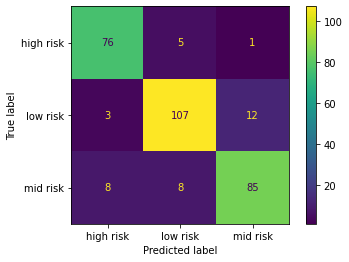

In [70]:
plot_confusion_matrix(RF2,x_test,y_test)

# Support Vector

In [71]:
from sklearn.svm import SVC

In [72]:
svc= SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [73]:
svc_pred=svc.predict(x_test)

In [74]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

   high risk       0.84      0.78      0.81        82
    low risk       0.61      0.92      0.73       122
    mid risk       0.66      0.29      0.40       101

    accuracy                           0.67       305
   macro avg       0.70      0.66      0.65       305
weighted avg       0.69      0.67      0.64       305



In [75]:
svc.score(x_test,y_test)

0.6721311475409836

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


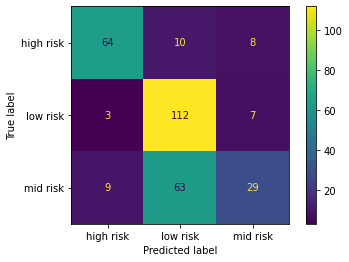

In [76]:
plot_confusion_matrix(svc,x_test,y_test)